## EDEX Grid Inventory

In [25]:
from awips.dataaccess import DataAccessLayer

# Set host
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

# Init data request
request = DataAccessLayer.newDataRequest()

# Set datatype
request.setDatatype("grid")

# Get a list of all available models
available_grids = DataAccessLayer.getAvailableLocationNames(request)

# Sort
available_grids.sort()

for grid in available_grids:
    print grid

AVN211
AVN225
DGEX
ECMF-Global
ECMF1
ECMF10
ECMF11
ECMF12
ECMF2
ECMF3
ECMF4
ECMF5
ECMF6
ECMF7
ECMF8
ECMF9
ETA
GFS
GFS40
GFSGuide
GFSLAMP5
HPCGuide
HPCqpfNDFD
HRRR
LAMP2p5
MRMS_1000
NAM12
NAM40
NCWF
NOHRSC-SNOW
NamDNG
NamDNG5
QPE-MSR
RAP13
RAP40
RTMA
RTMA5
URMA25
estofsPR
estofsUS


**LocationNames** is different for different plugins
- radar is icao
- satellite is sector


## Requesting a Grid

In [26]:
# Grid request
request.setLocationNames('RAP40')
request.setParameters("RH")
request.setLevels("850MB")

# Get available times
t = DataAccessLayer.getAvailableTimes(request)

# Select last available time [-1]
response = DataAccessLayer.getGridData(request, [t[0]])
data = response[0]
lon,lat = data.getLatLonCoords()

# Print info
print 'Time :', t[-1]
print 'Model:', data.getLocationName()
print 'Unit :', data.getUnit()
print 'Parm :', data.getParameter()

# Print data array
print data.getRawData().shape
print data.getRawData()
print "lat array =", lat
print "lon array =", lon


Time : 2016-02-23 15:00:00 (12)
Model: RAP40
Unit : %
Parm : RH
(151, 113)
[[ 93.05456543  93.05456543  87.05456543 ...,  73.05456543  72.05456543
   71.05456543]
 [ 70.05456543  70.05456543  67.05456543 ...,  69.05456543  46.05456924
   37.05456924]
 [ 40.05456924  56.05456924  68.05456543 ...,  51.05456924  73.05456543
   74.05456543]
 ..., 
 [ 65.05456543  62.05456924  63.05456924 ...,  67.05456543  65.05456543
   46.05456924]
 [ 48.05456924  59.05456924  62.05456924 ...,   4.05456877   5.05456877
    5.05456877]
 [  7.05456877   8.05456829  10.05456829 ...,  91.05456543  95.05456543
   95.05456543]]
lat array = [[ 54.24940109  54.35071945  54.45080566 ...,  57.9545517   57.91926193
   57.88272858]
 [ 57.84495163  57.80593109  57.76566696 ...,  58.07667542  58.08861542
   58.09931183]
 [ 58.10876846  58.11697769  58.12394714 ...,  56.40270996  56.46187973
   56.51980972]
 ..., 
 [ 19.93209648  19.89832115  19.86351395 ...,  20.054636    20.06362152
   20.07156372]
 [ 20.0784626   20

## Plotting a Grid with Basemap

Using **matplotlib**, **numpy**, and **basemap**:

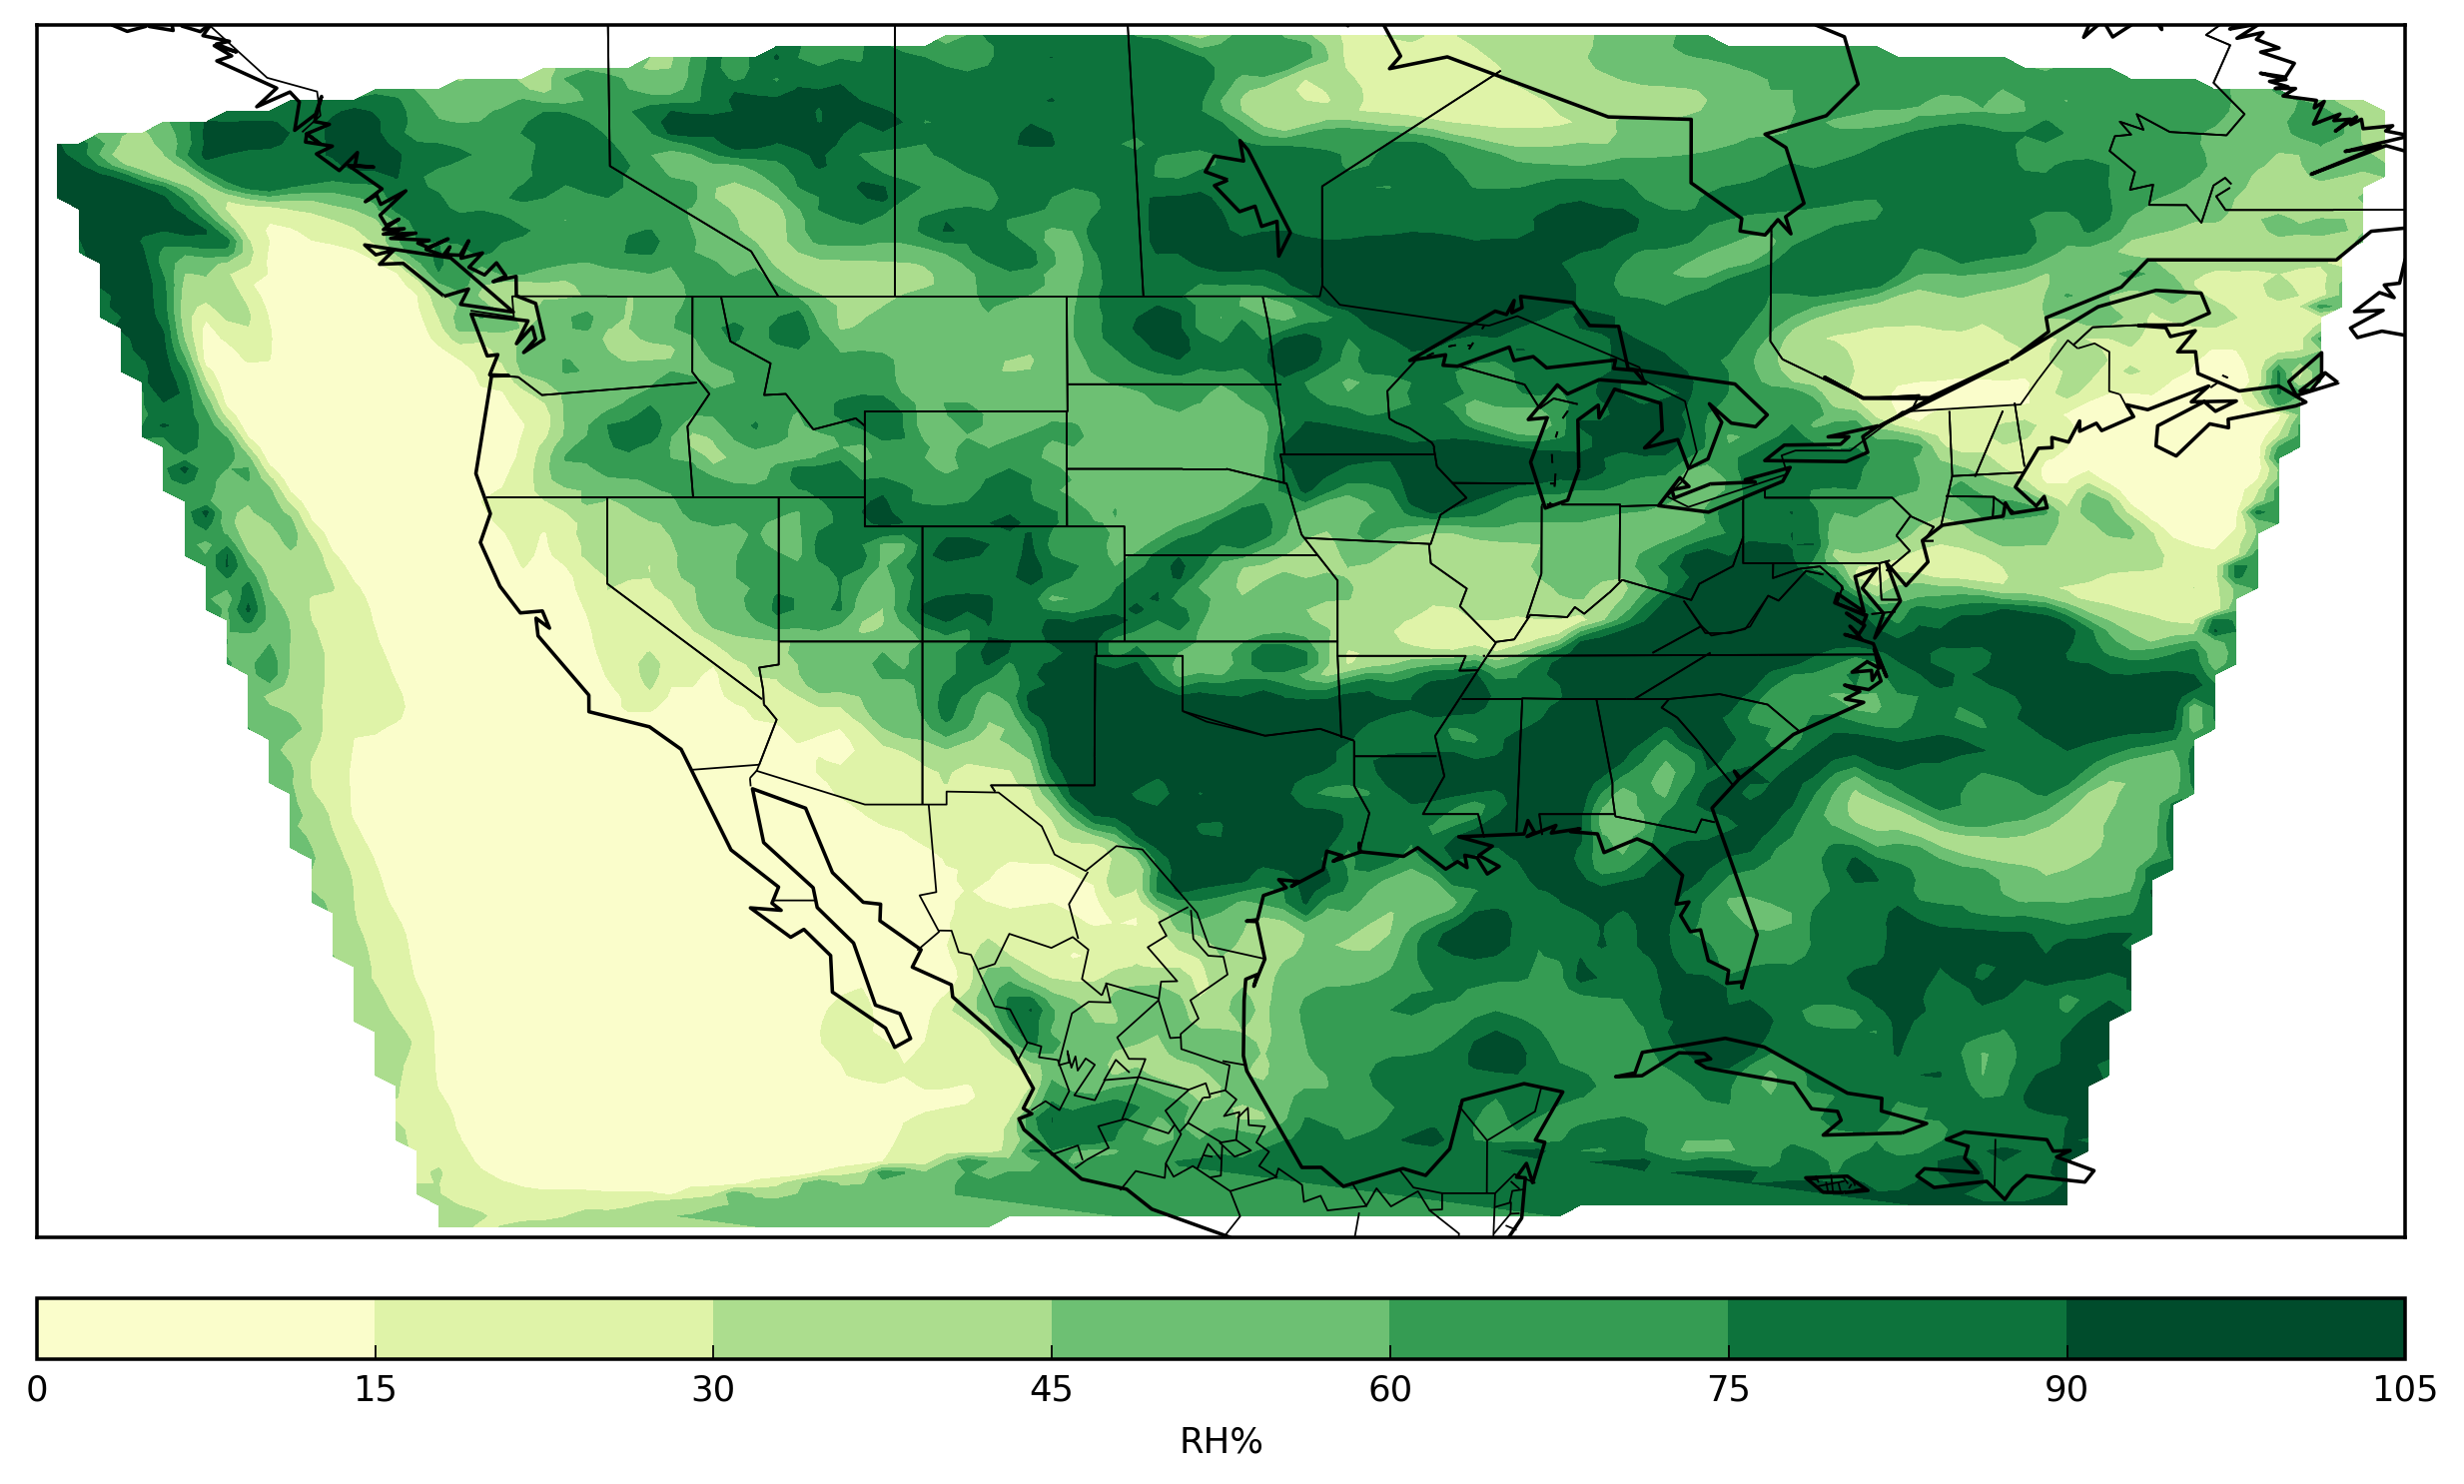

In [27]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from numpy import linspace, transpose
from numpy import meshgrid


plt.figure(figsize=(12, 12), dpi=100)
lons,lats = data.getLatLonCoords()

map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()

# 
# We have to reproject our grid, see https://stackoverflow.com/questions/31822553/m
#
x = linspace(0, map.urcrnrx, data.getRawData().shape[1])
y = linspace(0, map.urcrnry, data.getRawData().shape[0])
xx, yy = meshgrid(x, y)
ngrid = len(x)
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
          ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
          ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
          lats.flatten()), data.getRawData().flatten())
rdata = tli(rlons, rlats)
cs = map.contourf(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

# add colorbar.
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label(data.getParameter() + data.getUnit() )

# Show plot
plt.show()


or use **pcolormesh** rather than **contourf**

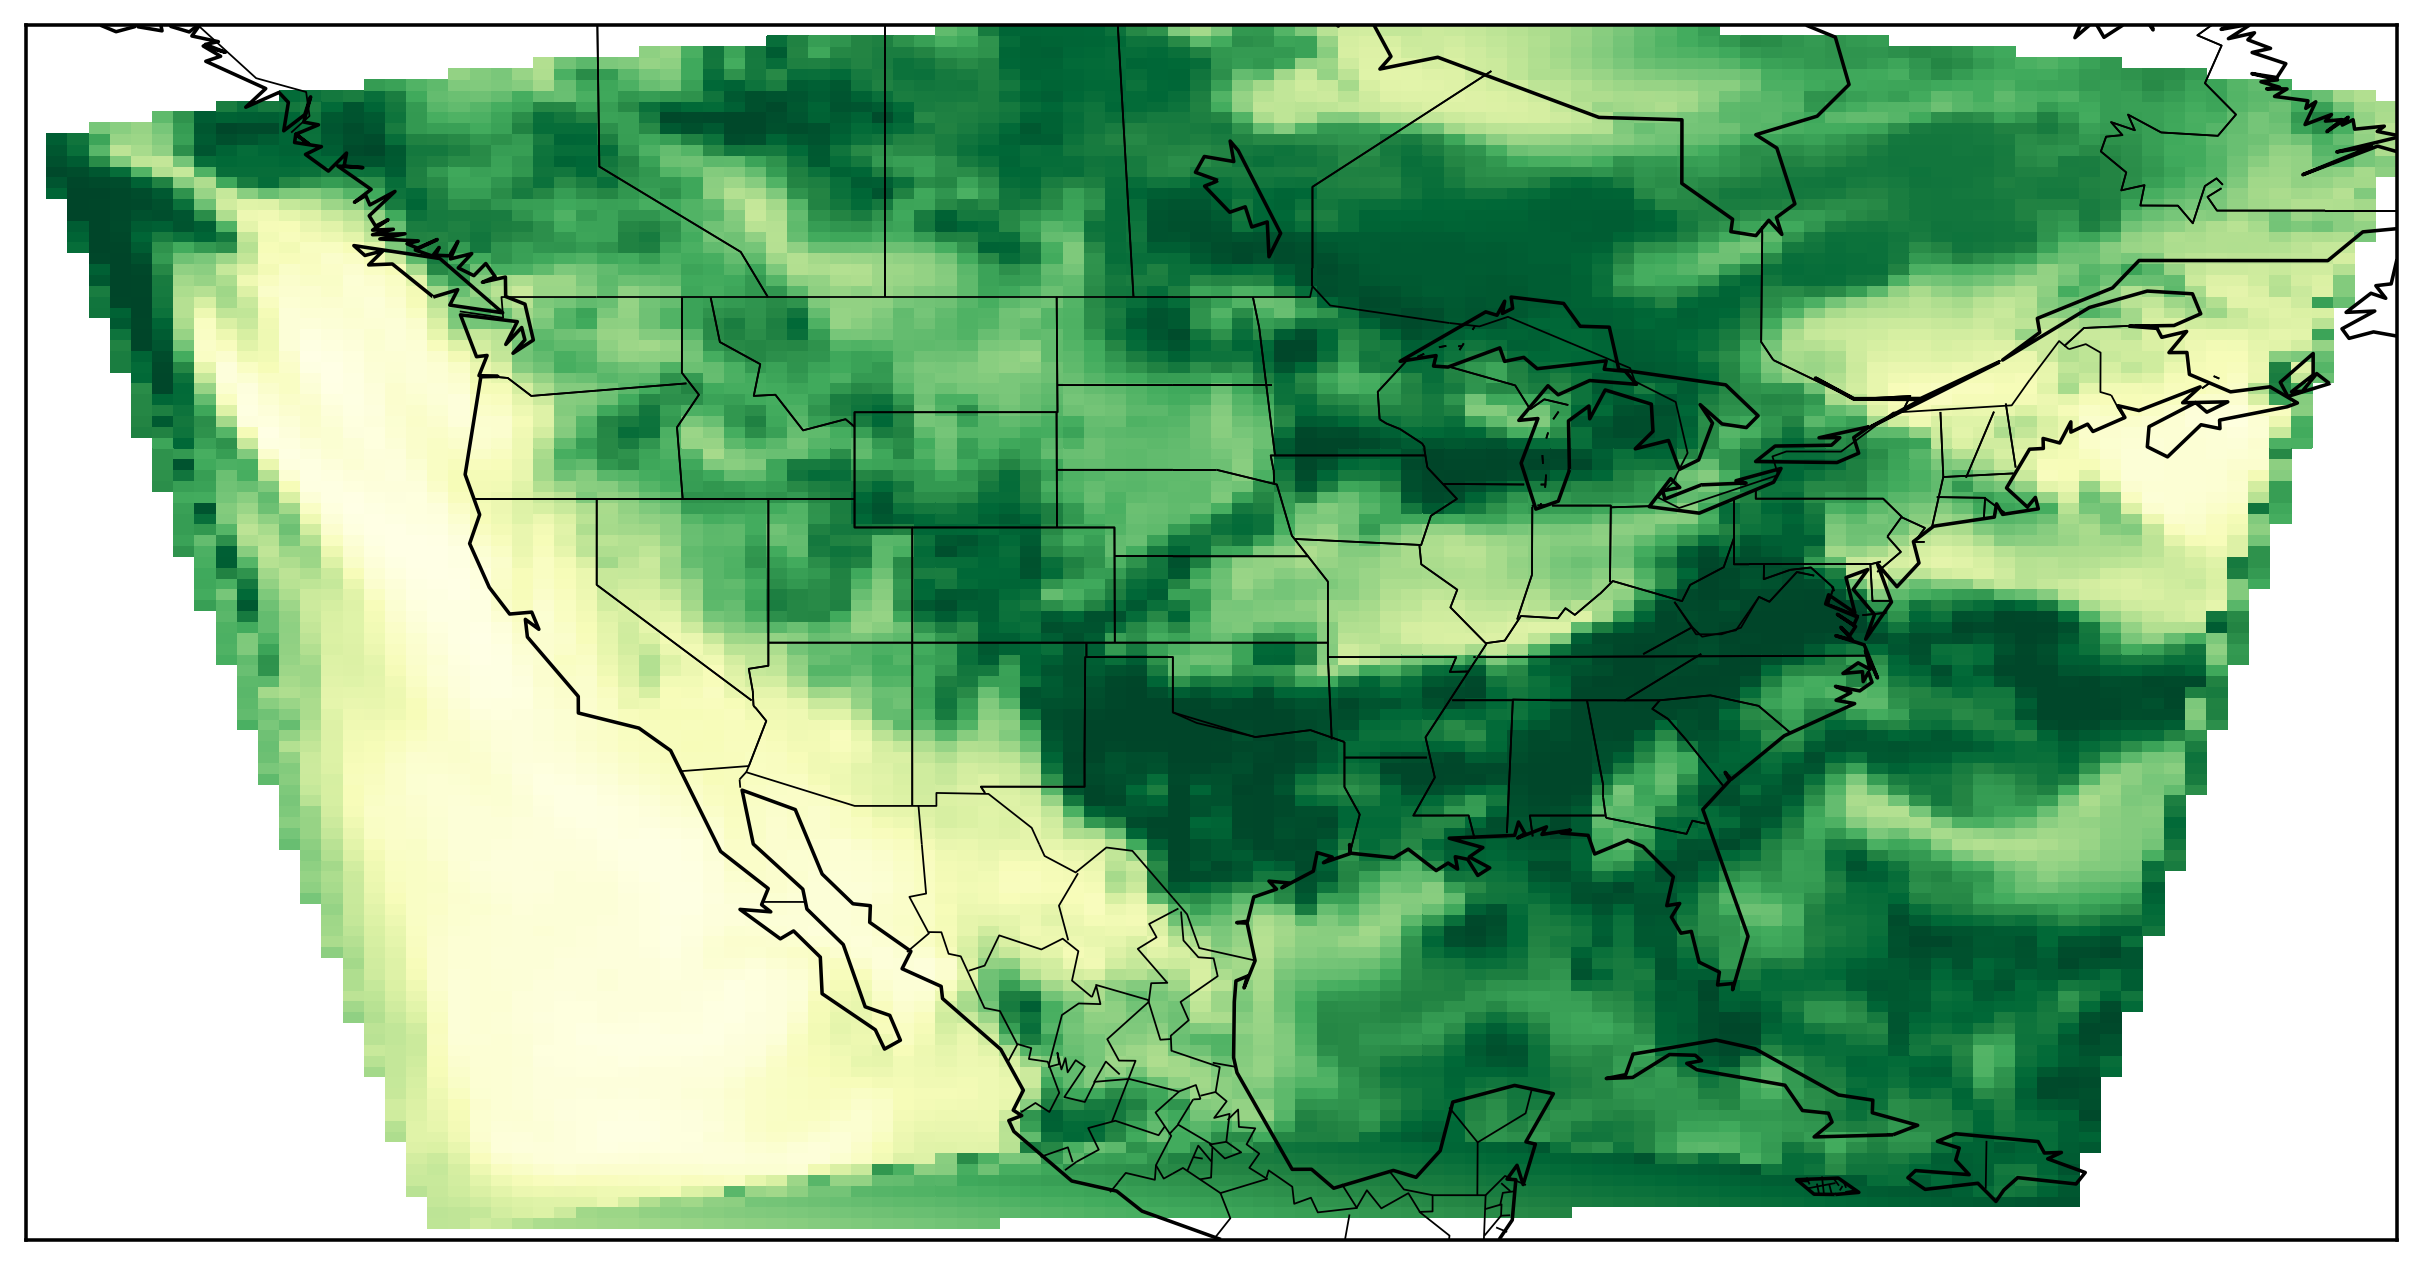

In [28]:
plt.figure(figsize=(12, 12), dpi=100)
map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
cs = map.pcolormesh(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

## Plotting a Grid with Cartopy

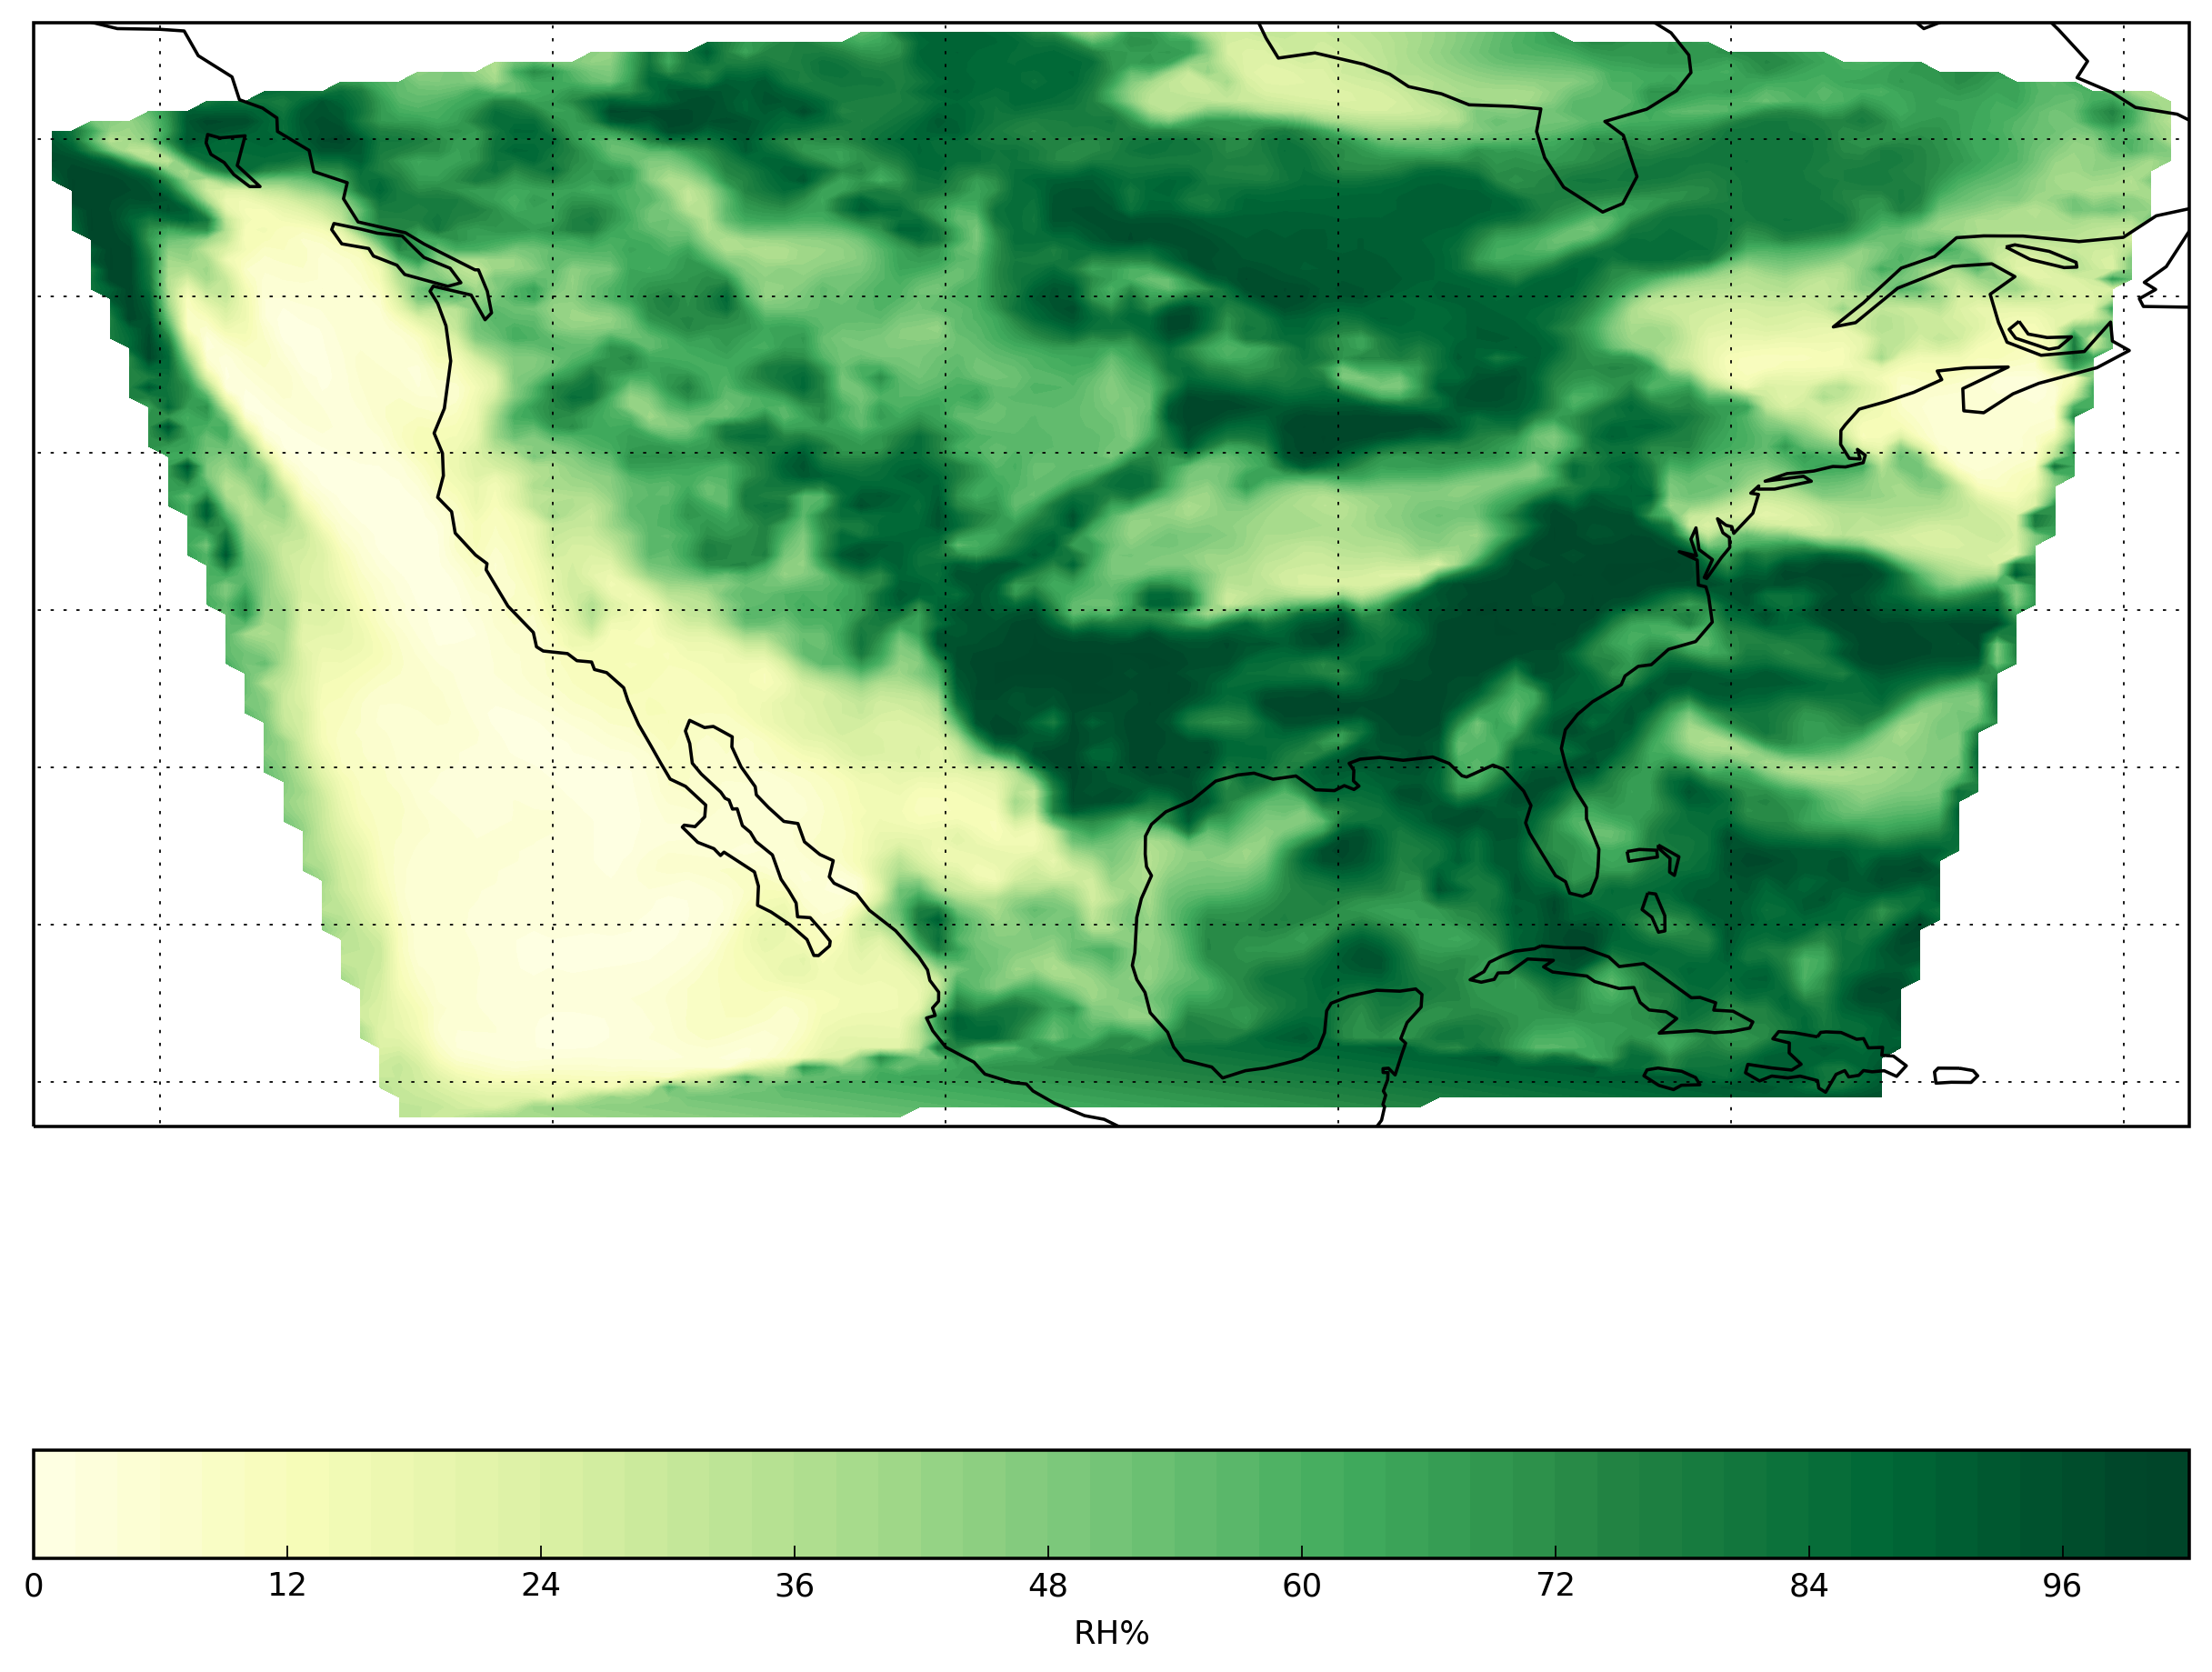

In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import iris
import cartopy.crs as ccrs
from cartopy import config

lon,lat = data.getLatLonCoords()
plt.figure(figsize=(12, 12), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
cs = plt.contourf(rlons, rlats, rdata, 60, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='YlGn')
ax.coastlines()
ax.gridlines()

# add colorbar
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(data.getParameter() + data.getUnit() )
plt.show()

(Mar 15 16 22:52:00 , Mar 15 16 22:52:00 )
430
86


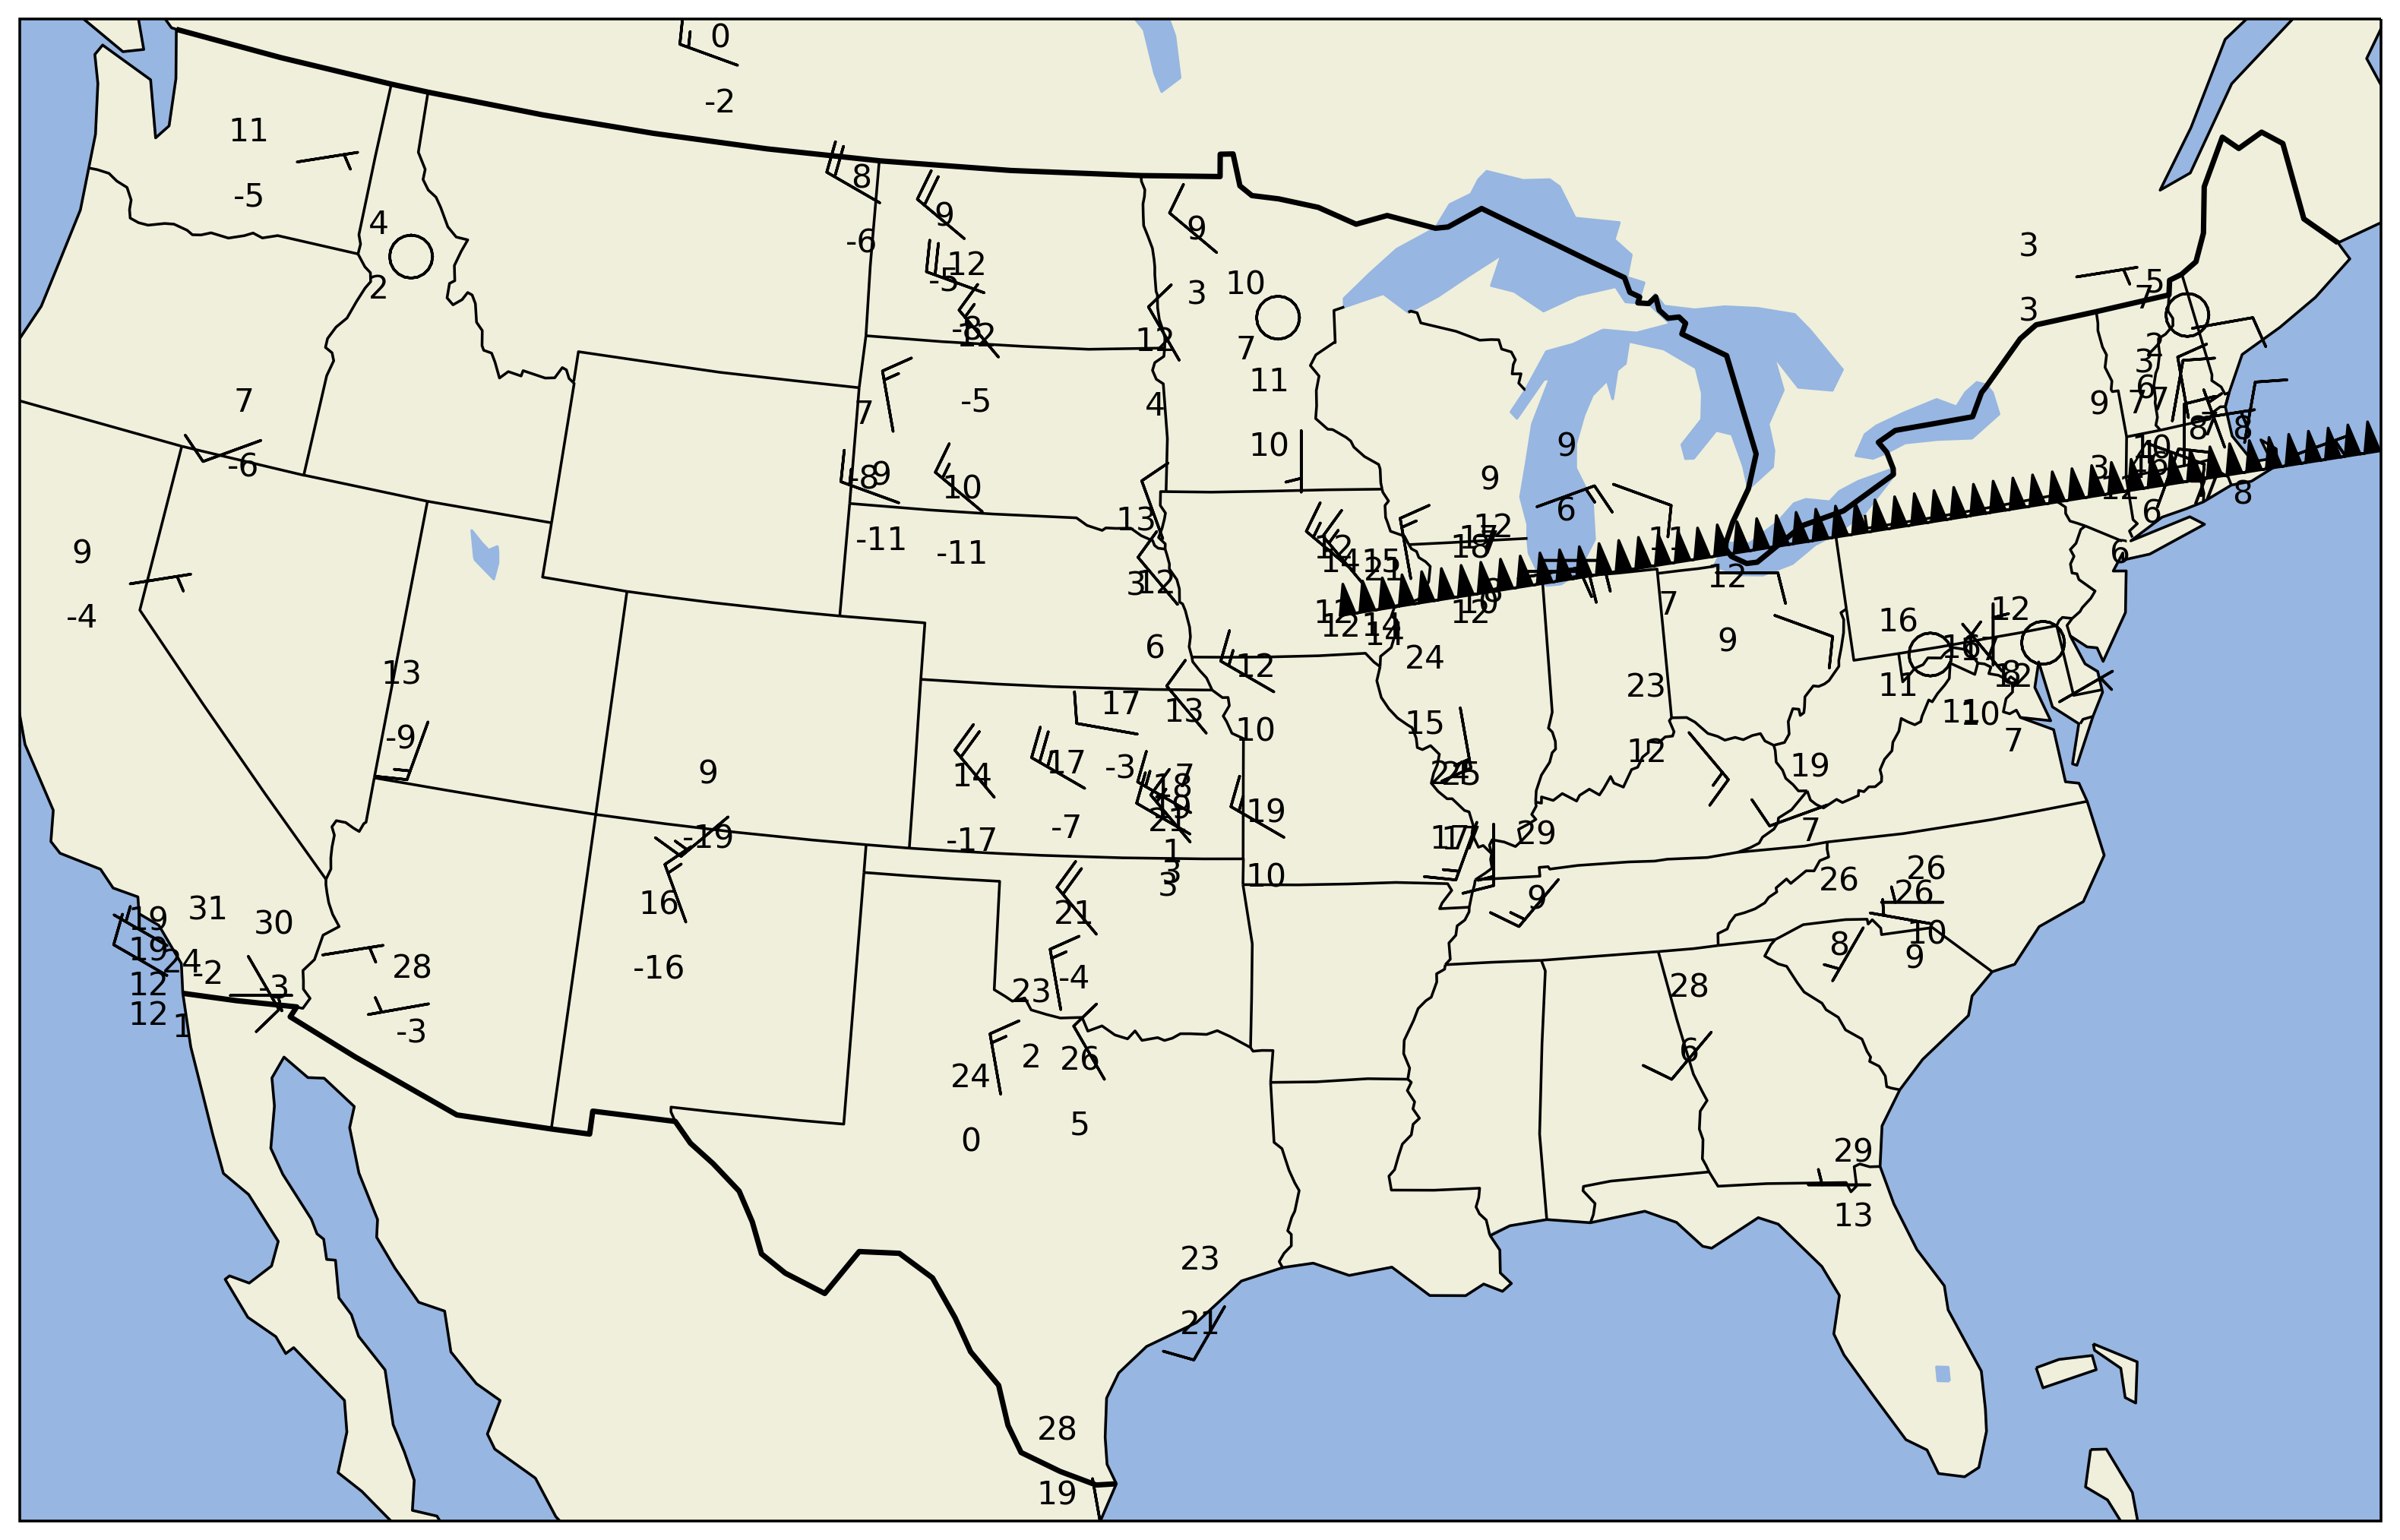

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.calc import get_wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot, StationPlotLayout, simple_layout
from metpy.units import units

# Initialize
data,latitude,longitude,stationName,temperature,dewpoint,seaLevelPress,windDir,windSpeed = [],[],[],[],[],[],[],[],[]
request = DataAccessLayer.newDataRequest()
request.setDatatype("obs")

#
# we need to set one station to query latest time.  this is hack-y and should be fixed
# because when you DON'T set a location name, you tend to get a single observation
# that came in a second ago, so your "latest data for the last time for all stations"
# data array consists of one village in Peru and time-matching is suspect right now.
#
# So here take a known US station (OKC) and hope/assume that a lot of other stations 
# are also reporting (and that this is a 00/20/40 ob). 
#
request.setLocationNames("KOKC")
datatimes = DataAccessLayer.getAvailableTimes(request)

# Get most recent time for location
time = datatimes[-1].validPeriod

# "presWeather","skyCover","skyLayerBase"
# are multi-dimensional(??) and returned seperately (not sure why yet)... deal with those later
request.setParameters("presWeather","skyCover", "skyLayerBase","stationName","temperature","dewpoint","windDir","windSpeed",
                      "seaLevelPress","longitude","latitude")
request.setLocationNames()
response = DataAccessLayer.getGeometryData(request,times=time)
print time
PRES_PARAMS = set(["presWeather"])
SKY_PARAMS = set(["skyCover", "skyLayerBase"])
# Build ordered arrays
wx,cvr,bas=[],[],[]
for ob in response:
    #print ob.getParameters()
    if set(ob.getParameters()) & PRES_PARAMS :
        wx.append(ob.getString("presWeather"))
        continue
    if set(ob.getParameters()) & SKY_PARAMS :
        cvr.append(ob.getString("skyCover"))
        bas.append(ob.getNumber("skyLayerBase"))
        continue
    latitude.append(float(ob.getString("latitude")))
    longitude.append(float(ob.getString("longitude")))
    #stationName.append(ob.getString("stationName"))
    temperature.append(float(ob.getString("temperature")))
    dewpoint.append(float(ob.getString("dewpoint")))
    seaLevelPress.append(float(ob.getString("seaLevelPress")))
    windDir.append(float(ob.getString("windDir")))
    windSpeed.append(float(ob.getString("windSpeed")))
    
    
print len(wx)
print len(temperature)


# Convert
data = dict()
data['latitude']  = np.array(latitude)
data['longitude'] = np.array(longitude)
data['air_temperature'] = np.array(temperature)* units.degC
data['dew_point_temperature'] = np.array(dewpoint)* units.degC
#data['air_pressure_at_sea_level'] = np.array(seaLevelPress)* units('mbar')
u, v = get_wind_components(np.array(windSpeed) * units('knots'),
                           np.array(windDir) * units.degree)
data['eastward_wind'], data['northward_wind'] = u, v

# Convert the fraction value into a code of 0-8, which can be used to pull out
# the appropriate symbol
#data['cloud_coverage'] = (8 * data_arr['cloud_fraction']).astype(int)

# Map weather strings to WMO codes, which we can use to convert to symbols
# Only use the first symbol if there are multiple
#wx_text = make_string_list(data_arr['weather'])
#wx_codes = {'':0, 'HZ':5, 'BR':10, '-DZ':51, 'DZ':53, '+DZ':55,
#            '-RA':61, 'RA':63, '+RA':65, '-SN':71, 'SN':73, '+SN':75}
#data['present_weather'] = [wx_codes[s.split()[0] if ' ' in s else s] for s in wx]

# Set up the map projection
import cartopy.crs as ccrs
import cartopy.feature as feat
from matplotlib import rcParams
rcParams['savefig.dpi'] = 255
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])
state_boundaries = feat.NaturalEarthFeature(category='cultural',
                                            name='admin_1_states_provinces_lines',
                                            scale='110m', facecolor='none')
# Create the figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add map elements 
ax.add_feature(feat.LAND, zorder=-1)
ax.add_feature(feat.OCEAN, zorder=-1)
ax.add_feature(feat.LAKES, zorder=-1)
ax.coastlines(resolution='110m', zorder=2, color='black')
ax.add_feature(state_boundaries)
ax.add_feature(feat.BORDERS, linewidth='2', edgecolor='black')
ax.set_extent((-118, -73, 23, 50))

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'], data['latitude'],
                          transform=ccrs.PlateCarree(), fontsize=12)

# The layout knows where everything should go, and things are standardized using
# the names of variables. So the layout pulls arrays out of `data` and plots them
# using `stationplot`.
simple_layout.plot(stationplot, data)